# Parkinson’s Disease 

## The Dataset

https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/

In [86]:
#Import Lib
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [87]:
# Read the CSV 
df = pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [89]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


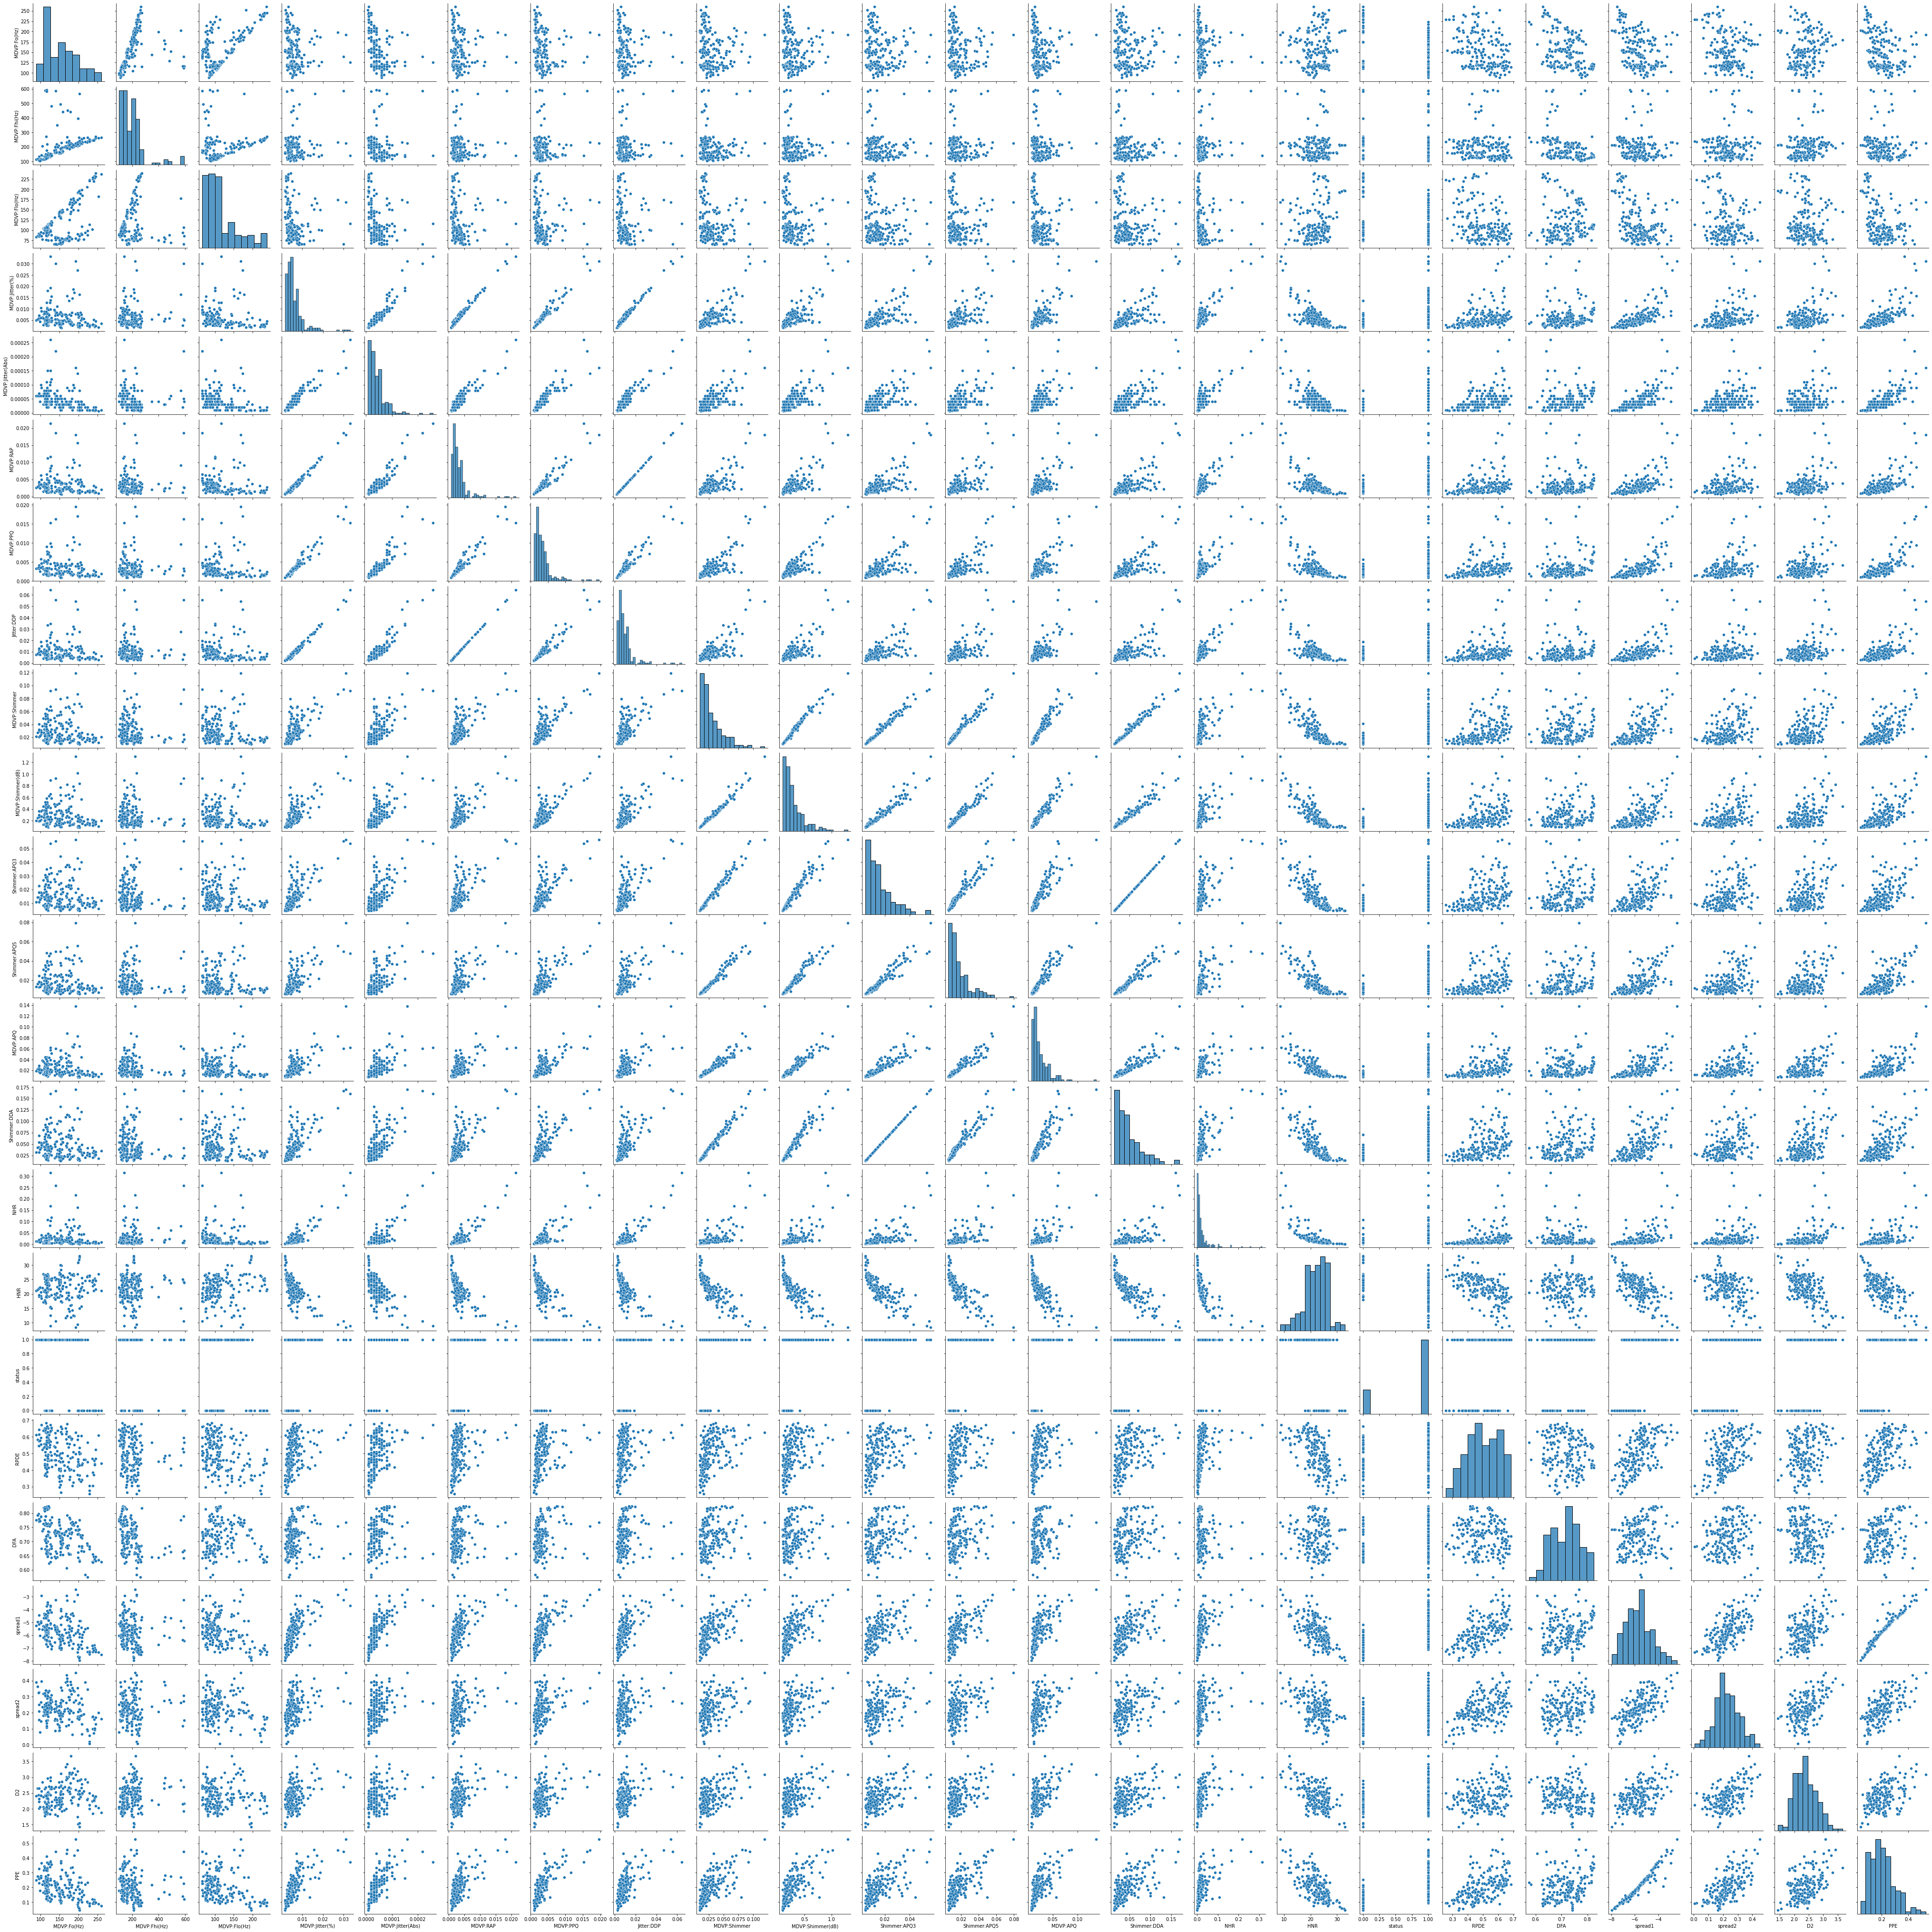

In [75]:
sns.pairplot(data=df[df.columns[0:24]])
plt.show()

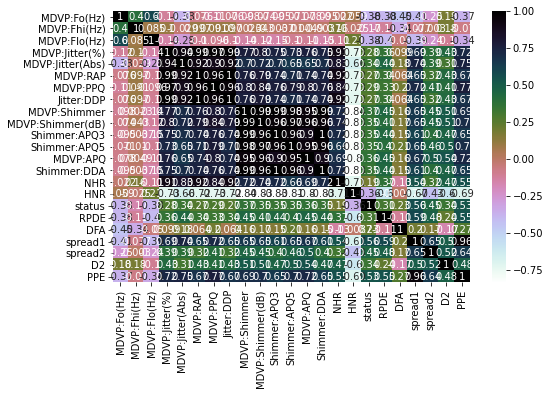

In [70]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

In [90]:
# Get the features and labels
all_features=df.loc[:,df.columns!='status'].values[:,1:]#all featueres 
out_come=df.loc[:,'status'].values#labels is status

In [91]:
out_come

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [92]:
 #Get the count of each label (0 and 1) in labels
print(out_come[out_come==1].shape[0], out_come[out_come==0].shape[0])

147 48


In [93]:
#DataFlair - Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(all_features)
y=out_come

In [94]:
print(X)

[[-0.63138346 -0.77481654 -0.89037042 ...  0.17153026 -0.21867743
  -0.0053808 ]
 [-0.6033463  -0.81013911 -0.4433544  ...  0.48267409 -0.05370956
   0.34265204]
 [-0.66992292 -0.88174367 -0.46942324 ...  0.37274182 -0.18236124
   0.19336492]
 ...
 [ 0.00546073 -0.43717403 -0.89854572 ... -0.31484696  0.11793486
  -0.63884033]
 [ 0.28578581  0.20361309 -0.89144127 ... -0.09423055 -0.36355605
  -0.67372646]
 [ 0.46654868 -0.35441175 -0.85610326 ... -0.16981039  0.00734563
  -0.5690805 ]]


In [95]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]


In [130]:
#Split the dataset train = 80 % and test =20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [131]:
#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)

SVC(gamma=0.1, random_state=0)

In [132]:
#Applying XGBoost
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)


In [139]:
print('The accuracy of the GaussianNB classifier on training data is {:.2f}'.format(nb.score(X_train, y_train)*100))
print('The accuracy of the GaussianNB classifier on test data is {:.2f}'.format(nb.score(X_test, y_test)*100))

The accuracy of theRegression classifier  classifier on training data is 69.23
The accuracy of the Logistic Regression classifier on test data is 74.36


In [134]:
#Applying Decision Tree
from sklearn import tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [135]:
#Applying RandomForest
from sklearn.ensemble import RandomForestClassifier

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [136]:
#Applying Regression classifier 
lg = LogisticRegression(solver='lbfgs')
lg.fit(X_train, y_train)

LogisticRegression()

In [138]:
#Applying GaussianNB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train , y_train)

GaussianNB()

In [143]:
#Print performance
print ('The accuracy of the performance training data and test data   ')
print('')
print('')
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
print('The accuracy of the SVM classifier on training data is : {:.2f}'.format(svm.score(X_train, y_train)*100))
print('The accuracy of the SVM classifier on test data is : {:.2f}'.format(svm.score(X_test ,y_test)*100))
print('')
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
print('The accuracy of the XGBoost classifier on training data is : {:.2f}'.format(xgb_clf.score(X_train, y_train)*100))
print('The accuracy of the XGBoost classifier on test data is : {:.2f}'.format(xgb_clf.score(X_test, y_test)*100))
print('')
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
print('The accuracy of the Knn classifier on training data is : {:.2f}'.format(knn.score(X_train, y_train)*100))
print('The accuracy of the Knn classifier on test data is : {:.2f}'.format(knn.score(X_test, y_test)*100))
print('')
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
print('The accuracy of the Decision Tree classifier on training data is : {:.2f}'.format(decision_tree.score(X_train, y_train)*100))
print('The accuracy of the Decision Tree classifier on test data is : {:.2f}'.format(decision_tree.score(X_test, y_test)*100))
print('')
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
print('The accuracy of the Random Forest classifier on training data is : {:.2f}'.format(random_forest.score(X_train, y_train)*100))
print('The accuracy of the Random Forest classifier on test data is : {:.2f}'.format(random_forest.score(X_test, y_test)*100))
print('')
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
print('The accuracy of the Logistic Regression classifier on training data is : {:.2f}'.format(lg.score(X_train, y_train)*100))
print('The accuracy of the Logistic Regression classifier on test data is : {:.2f}'.format(lg.score(X_test, y_test)*100))
print('')
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
print('The accuracy of the GaussianNB classifier on training data is : {:.2f}'.format(nb.score(X_train, y_train)*100))
print('The accuracy of the GaussianNB classifier on test data is : {:.2f}'.format(nb.score(X_test, y_test)*100))

The accuracy of the performance training data and test data   


+++++++++++++++++++++++++++++++++++++++++++++++++++++++

The accuracy of the SVM classifier on training data is : 86.54
The accuracy of the SVM classifier on test data is : 87.18

+++++++++++++++++++++++++++++++++++++++++++++++++++++++

The accuracy of the XGBoost classifier on training data is : 100.00
The accuracy of the XGBoost classifier on test data is : 92.31

+++++++++++++++++++++++++++++++++++++++++++++++++++++++

The accuracy of the Knn classifier on training data is : 94.23
The accuracy of the Knn classifier on test data is : 89.74

+++++++++++++++++++++++++++++++++++++++++++++++++++++++

The accuracy of the Decision Tree classifier on training data is : 100.00
The accuracy of the Decision Tree classifier on test data is : 82.05

+++++++++++++++++++++++++++++++++++++++++++++++++++++++

The accuracy of the Random Forest classifier on training data is : 100.00
The accuracy of the Random Forest classifier on test d